In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
with open(r'gratkapl_domy_sopot.json', 'r') as f:
    data1 = json.load(f)
df1 = pd.DataFrame(data1)

with open(r'gratkapl_mieszkania_sopot.json', 'r') as f:
    data2 = json.load(f)
df2 = pd.DataFrame(data2)

with open(r'gratkapl_domy_gdynia.json', 'r') as f:
    data3 = json.load(f)
df3 = pd.DataFrame(data3)

with open(r'gratkapl_mieszkania_gdynia.json', 'r') as f:
    data4 = json.load(f)
df4 = pd.DataFrame(data4)

with open(r'gratkapl_mieszkania_gdansk.json', 'r') as f:
    data5 = json.load(f)
df5 = pd.DataFrame(data5)

with open(r'gratkapl_domy_gdansk.json', 'r') as f:
    data6 = json.load(f)
df6 = pd.DataFrame(data6)


In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6],sort=False, ignore_index =True)
df.shape

(4534, 62)

In [4]:
df.head()

,adres,cena,cena_waluta,cena_za_metr,dach,data_aktualizacji,droga-dojazdowa,elewacja,id_ogloszenia,kanalizacja,...,stan-lazienki,typ-zabudowy,typ_domu,usytuowanie-wzgledem-stron-swiata,zdrowie-i-uroda,data_dostepne,dostepnosc-od,liczba-miejsc-parkingowych,bezpieczenstwo,powierzchnia-uzytkowa-w-m2
0,"Sopot,Górny,pomorskie",1890000.0,zł,10500.00,NaN,2020-05-16,NaN,NaN,15889337,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sopot,pomorskie",1249000.0,zł,10408.33,NaN,2020-05-14,NaN,NaN,15675420,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sopot,Górny,pomorskie",2890000.0,zł,18062.50,NaN,2020-05-11,utwardzana,NaN,14800414,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Sopot,Wyścigi,pomorskie",2990000.0,zł,17485.38,papa,2020-05-15,asfaltowa,NaN,13529041,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Sopot,Górny,pomorskie",2490000.0,zł,5209.21,NaN,2020-05-11,utwardzana,NaN,16533912,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['adres', 'cena', 'cena_waluta', 'cena_za_metr', 'dach',
       'data_aktualizacji', 'droga-dojazdowa', 'elewacja', 'id_ogloszenia',
       'kanalizacja', 'ksztalt-dzialki', 'liczba-pieter-w-budynku',
       'liczba-pokoi', 'liczba_pieter_budynku', 'liczba_pokoi', 'lokalizacja',
       'material-budynku', 'media', 'miejsce-parkingowe', 'numer-referencyjny',
       'ogrodzenie-dzialki', 'ogrzewanie-i-energia', 'poddasze',
       'podpiwniczenie', 'powierzchnia', 'powierzchnia-dodatkowa',
       'powierzchnia-dzialki-w-m2', 'powierzchnia-w-m2',
       'powierzchnia_dzialki', 'rok-budowy', 'rok_budowy', 'stan', 'tresc',
       'typ_nieruchomosci', 'tytul', 'wykonczenie', 'zdjecie',
       'czy-mieszkanie-ma-lazienke', 'edukacja', 'forma-kuchni',
       'forma-wlasnosci', 'forma-wyposazenie-lazienki', 'glosnosc',
       'komunikacja', 'kuchnia', 'nazwa-inwestycji', 'okna',
       'oplaty-czynsz-administracyjny-media', 'pietro', 'pozostale',
       'rodzaj_zabudowy', 'stan-instalacji'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 62 columns):
adres                                  4534 non-null object
cena                                   4534 non-null float64
cena_waluta                            4534 non-null object
cena_za_metr                           4527 non-null float64
dach                                   256 non-null object
data_aktualizacji                      4534 non-null object
droga-dojazdowa                        283 non-null object
elewacja                               37 non-null object
id_ogloszenia                          4534 non-null object
kanalizacja                            72 non-null object
ksztalt-dzialki                        209 non-null object
liczba-pieter-w-budynku                4447 non-null object
liczba-pokoi                           4511 non-null object
liczba_pieter_budynku                  4447 non-null object
liczba_pokoi                           4511 non-null objec

In [7]:
df_gratka = df[['adres','cena','cena_za_metr','data_aktualizacji','id_ogloszenia','liczba_pieter_budynku',
               'liczba_pokoi','powierzchnia','powierzchnia_dzialki', 'rok_budowy', 'tresc', 'kuchnia',
               'typ_nieruchomosci', 'tytul', 'wykonczenie', 'zdjecie','rodzaj_zabudowy', 'typ_domu', 'pietro',
                'data_dostepne',     'miejsce-parkingowe', 'forma-wlasnosci', 'oplaty-czynsz-administracyjny-media'
               ]]

In [8]:
df_gratka = df_gratka.assign(adres_miasto = df_gratka['adres'].str.split(',').apply(pd.Series, 1)[0])
df_gratka['adres_miasto'].unique()

array(['Sopot', 'Gdynia', 'Gdańsk'], dtype=object)

In [9]:
df_gratka = df_gratka.assign(adres_dzielnica = df_gratka['adres'].str.split(',').apply(pd.Series, 1)[1])
df_gratka['adres_dzielnica'].unique()

array(['Górny', 'pomorskie', 'Wyścigi', 'GÓRNY', 'KamiennyPotok',
       'Świemirowo', 'Dolny', 'Centrum', 'GórnySopot', 'SopotGórny',
       'FLORYDA', 'DOLNY', 'Przylesie', 'BRODWINO', 'Brodwino',
       'DolnySopot', 'Sopot', 'SopotDolny', 'Karlikowo', 'Redłowo',
       'Oksywie', 'WielkiKack', 'Pogórze', 'Orłowo', 'Dąbrowa',
       'MałyKack', 'Karwiny', 'Chwarzno-Wiczlino', 'Chylonia', 'Chwarzno',
       'Wiczlino', 'DziałkiLeśne', 'WzgórzeŚw.Maksymiliana',
       'Śródmieście', 'WzgórzeŚwiętegoMaksymiliana',
       'Witomino-Leśniczówka', 'Witomino', 'ChwarznoWiczlino', 'Obłuże',
       'Grabówek', 'Cisowa', 'Leszczynki', 'KamiennaGóra',
       'PustkiCisowskie', 'GdyniaCisowa', 'Wzgórześw.Maksymiliana',
       'centrum', 'Kosakowo', 'FIKAKOWO', 'BabieDoły', 'GDYNIA',
       'CENTRUM', 'KaczeBuki', 'Witomino-Radiostacja', 'GdyniaChwarzno',
       'StareObłuże', 'Fikakowo', 'WitominoLeśniczówka',
       'PustkiCisowskie-Demptowo', 'PustkiCiskowskie',
       'WZGÓRZEŚW.MAKSYMILIANA

In [10]:
df_gratka['adres_dzielnica'].unique().size

145

In [11]:
df_gratka['adres_dzielnica'].replace({'-':''},regex=True, inplace=True)
df_gratka = df_gratka.assign(adres_dzielnica = df_gratka['adres_dzielnica'].str.lower())
df_gratka['adres_dzielnica'].replace({'pomorskie': np.nan},regex=True, inplace=True)
df_gratka['adres_dzielnica'].replace({'sopot': np.nan},regex=True, inplace=True)
df_gratka['adres_dzielnica'].replace({'gdynia.': np.nan},regex=True, inplace=True)
df_gratka['adres_dzielnica'].replace({'gdańsk': np.nan},regex=True, inplace=True)
df_gratka['adres_dzielnica'].unique()

array(['górny', nan, 'wyścigi', 'kamiennypotok', 'świemirowo', 'dolny',
       'centrum', 'floryda', 'przylesie', 'brodwino', 'karlikowo',
       'redłowo', 'oksywie', 'wielkikack', 'pogórze', 'orłowo', 'dąbrowa',
       'małykack', 'karwiny', 'chwarznowiczlino', 'chylonia', 'chwarzno',
       'wiczlino', 'działkileśne', 'wzgórześw.maksymiliana',
       'śródmieście', 'wzgórzeświętegomaksymiliana',
       'witominoleśniczówka', 'witomino', 'obłuże', 'grabówek', 'cisowa',
       'leszczynki', 'kamiennagóra', 'pustkicisowskie', 'kosakowo',
       'fikakowo', 'babiedoły', 'gdynia', 'kaczebuki',
       'witominoradiostacja', 'stareobłuże', 'pustkicisowskiedemptowo',
       'pustkiciskowskie', 'chyylonia', 'pogórzedolne', 'oruniagórna',
       'wrzeszcz', 'ujeścisko', 'staremiasto', 'siedlce', 'żabianka',
       'łostowice', 'chełm', 'przymorze', 'piecki', 'jasień', 'letnica',
       'brzeźno', 'zakoniczyn', 'morena', 'przeróbka', 'oliwa',
       'suchanino', 'maćkowy', 'zaspa', 'matarnia',

In [12]:
df_gratka['adres_dzielnica'].unique().size

117

In [13]:
df_gratka.head()

,adres,cena,cena_za_metr,data_aktualizacji,id_ogloszenia,liczba_pieter_budynku,liczba_pokoi,powierzchnia,powierzchnia_dzialki,rok_budowy,...,zdjecie,rodzaj_zabudowy,typ_domu,pietro,data_dostepne,miejsce-parkingowe,forma-wlasnosci,oplaty-czynsz-administracyjny-media,adres_miasto,adres_dzielnica
0,"Sopot,Górny,pomorskie",1890000.0,10500.00,2020-05-16,15889337,4,5,180.0,255.0,1990.0,...,True,NaN,NaN,NaN,NaN,brak miejsca parkingowego,NaN,NaN,Sopot,górny
1,"Sopot,pomorskie",1249000.0,10408.33,2020-05-14,15675420,3,4,120.0,196.0,1930.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sopot,NaN
2,"Sopot,Górny,pomorskie",2890000.0,18062.50,2020-05-11,14800414,2,5,160.0,835.0,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sopot,górny
3,"Sopot,Wyścigi,pomorskie",2990000.0,17485.38,2020-05-15,13529041,1,4,171.0,329.0,1985.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sopot,wyścigi
4,"Sopot,Górny,pomorskie",2490000.0,5209.21,2020-05-11,16533912,2,7,478.0,NaN,2002.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sopot,górny


In [14]:
del df_gratka['adres']

In [15]:
df_gratka["cena"].isnull().sum()

0

In [16]:
df_gratka["powierzchnia"].isnull().sum()

8

In [17]:
df_gratka["cena_za_metr"].isnull().sum()

7

In [18]:
df_gratka[(df_gratka["powierzchnia"].isnull())]

,cena,cena_za_metr,data_aktualizacji,id_ogloszenia,liczba_pieter_budynku,liczba_pokoi,powierzchnia,powierzchnia_dzialki,rok_budowy,tresc,...,zdjecie,rodzaj_zabudowy,typ_domu,pietro,data_dostepne,miejsce-parkingowe,forma-wlasnosci,oplaty-czynsz-administracyjny-media,adres_miasto,adres_dzielnica
473,1549000.0,NaN,2020-05-08,16555870,0 (parter),4,NaN,100.0,2016.0,"Telefon: PL \n+48...\npokaż numer\n\nWygodny, ...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdynia,małykack
1413,970000.0,9897.96,2020-04-22,14330197,NaN,1,NaN,NaN,NaN,Numer licencji pośrednika odpowiedzialnego za ...,...,True,NaN,NaN,parter,NaN,NaN,NaN,NaN,Gdynia,śródmieście
1633,375000.0,NaN,2020-05-12,16557032,NaN,2,NaN,NaN,NaN,Gdynia Witomino-Leśniczówka 58m2 działka mi...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdynia,witominoleśniczówka
1634,1100000.0,NaN,2020-05-12,16460620,NaN,4,NaN,NaN,NaN,Gdynia Dz. Leśne mini osiedle. Komfort. aparta...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdynia,działkileśne
1635,375000.0,NaN,2020-05-12,16463060,NaN,2,NaN,NaN,NaN,Gdynia Witomino-Leśniczówka 58m2 działka mi...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdynia,witominoleśniczówka
1636,1100000.0,NaN,2020-05-05,16389621,NaN,4,NaN,NaN,NaN,Gdynia Dz. Leśne mini osiedle. Komfort. aparta...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdynia,działkileśne
4230,370000.0,NaN,2020-04-28,16282119,NaN,2,NaN,NaN,NaN,Gdańsk Żabianka 31m 2 pokoje z aneksem 370000 ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdańsk,żabianka
4530,879000.0,NaN,2020-02-18,5453767,0 (parter),4,NaN,302.0,1991.0,"Dom szeregowy środkowy na Ujeścisku 210 m2, dz...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gdańsk,ujeścisko


In [19]:
df_gratka[(df_gratka["powierzchnia"].isnull()) & (df_gratka["cena_za_metr"]> 0)]

,cena,cena_za_metr,data_aktualizacji,id_ogloszenia,liczba_pieter_budynku,liczba_pokoi,powierzchnia,powierzchnia_dzialki,rok_budowy,tresc,...,zdjecie,rodzaj_zabudowy,typ_domu,pietro,data_dostepne,miejsce-parkingowe,forma-wlasnosci,oplaty-czynsz-administracyjny-media,adres_miasto,adres_dzielnica
1413,970000.0,9897.96,2020-04-22,14330197,NaN,1,NaN,NaN,NaN,Numer licencji pośrednika odpowiedzialnego za ...,...,True,NaN,NaN,parter,NaN,NaN,NaN,NaN,Gdynia,śródmieście


In [20]:
df_gratka.loc[(df_gratka["powierzchnia"].isnull()) & (df_gratka["cena_za_metr"]> 0), "powierzchnia" ] = (df_gratka.loc[1413]['cena']/df_gratka.loc[1413]['cena_za_metr'])

In [21]:
df_gratka.loc[1413]

cena                                                                              970000
cena_za_metr                                                                     9897.96
data_aktualizacji                                                             2020-04-22
id_ogloszenia                                                                   14330197
liczba_pieter_budynku                                                                NaN
liczba_pokoi                                                                           1
powierzchnia                                                                          98
powierzchnia_dzialki                                                                 NaN
rok_budowy                                                                           NaN
tresc                                  Numer licencji pośrednika odpowiedzialnego za ...
kuchnia                                                                              NaN
typ_nieruchomosci    

In [22]:
df_gratka.shape

(4534, 24)

In [23]:
df_gratka.dropna(subset=["powierzchnia"], inplace=True)
df_gratka.shape

(4527, 24)

In [24]:
df_gratka["powierzchnia"].isnull().sum()

0

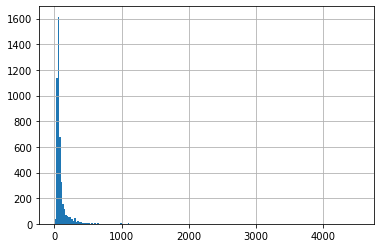

In [25]:
df_gratka["powierzchnia"].hist(bins=200)

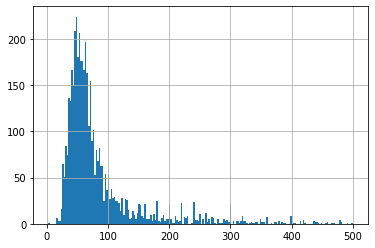

In [26]:
df_gratka.loc[(df_gratka["powierzchnia"]< 500),"powierzchnia"].hist(bins=200)

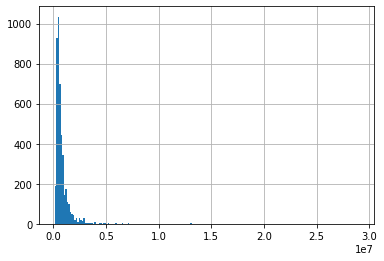

In [27]:
df_gratka["cena"].hist(bins=200)

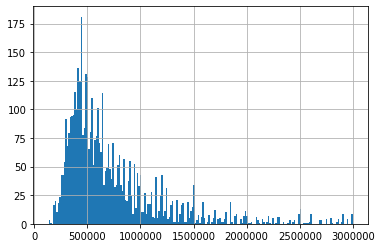

In [28]:
df_gratka.loc[(df_gratka["cena"]< 3000000),"cena"].hist(bins=200)

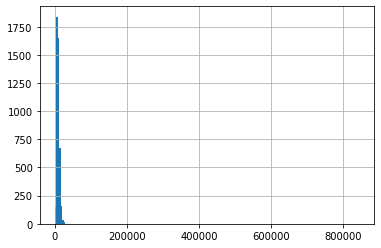

In [29]:
df_gratka["cena_za_metr"].hist(bins=200)

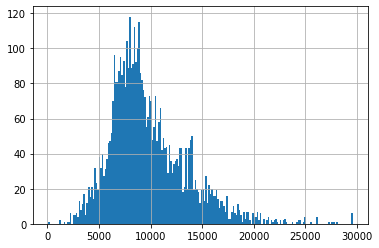

In [31]:
df_gratka.loc[(df_gratka["cena_za_metr"]< 30000),"cena_za_metr"].hist(bins=200)

In [33]:
#df_gratka.groupby(by=["adres_miasto", "typ_nieruchomosci"]).size()

In [34]:
#df_gratka.groupby(by=["adres_miasto", "typ_nieruchomosci"])["cena"].mean()

In [35]:
df_gratka.groupby(by=["adres_miasto", "typ_nieruchomosci"])["cena_za_metr", "powierzchnia"].describe()

cena_za_metr                              \
                                      count          mean           std   
adres_miasto typ_nieruchomosci                                            
Gdańsk       domy                     302.0   6058.346755   2274.297152   
             mieszkania              2593.0  10537.883239  16960.453413   
Gdynia       domy                     209.0   6587.561627   4229.063279   
             mieszkania              1016.0   9446.421083   3872.780716   
Sopot        domy                      42.0   9520.105238   4388.119178   
             mieszkania               365.0  13172.908082   3598.444397   

                                                                          \
                                    min       25%        50%         75%   
adres_miasto typ_nieruchomosci                                             
Gdańsk       domy               1988.89   4746.82   5710.405   6897.0325   
             mieszkania          100.37   7785.71   9268.290  12000.0000   
Gdynia       domy               1202.40   4050.00   5291.670   7674.4200   
             mieszkania         2209.30   7169.80   8444.385  10513.2400   
Sopot        domy               3353.66   6326.40   8905.740  11208.6800   
             mieszkania         3353.66  10802.47  12696.510  14919.3500   

                                          powierzchnia              \
                                      max        count        mean   
adres_miasto typ_nieruchomosci                                       
Gdańsk       domy                17000.00        302.0  254.925662   
             mieszkania         845000.00       2593.0   62.112572   
Gdynia       domy                32142.86        209.0  307.126555   
             mieszkania          38090.91       1016.0   74.752835   
Sopot        domy                24528.30         42.0  326.825000   
             mieszkania          24567.90        365.0   81.191918   

                                                                               \
                                       std    min       25%     50%       75%   
adres_miasto typ_nieruchomosci                                                  
Gdańsk       domy               285.968727   50.0  153.0800  200.00  294.3750   
             mieszkania          68.804280    2.6   45.0000   56.12   70.4400   
Gdynia       domy               324.981769   50.0  189.0000  240.00  320.0000   
             mieszkania          71.474015   17.0   48.8600   63.00   85.2000   
Sopot        domy               140.604286  120.0  200.6175  300.00  439.3225   
             mieszkania          57.002317   24.5   52.0000   71.00   95.0000   

                                        
                                   max  
adres_miasto typ_nieruchomosci          
Gdańsk       domy               4543.0  
             mieszkania         3322.0  
Gdynia       domy               3950.7  
             mieszkania         1707.0  
Sopot        domy                656.0  
             mieszkania          659.0

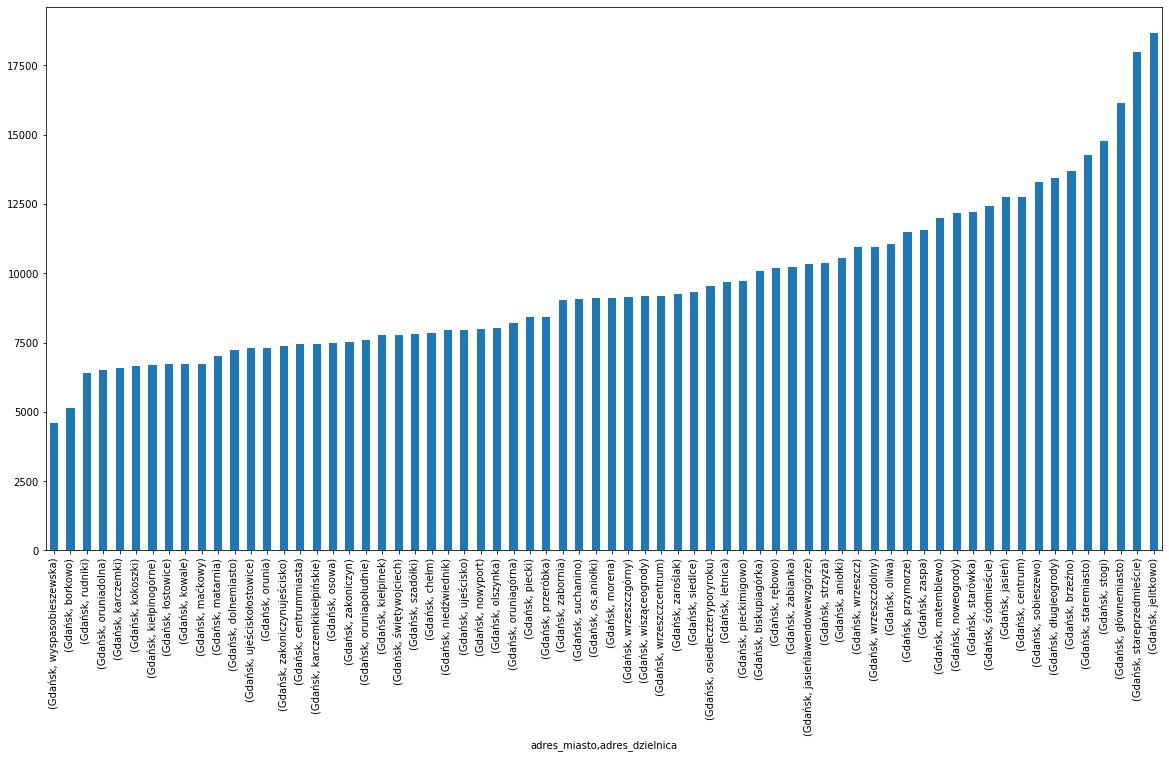

In [36]:
plt.figure(figsize=(20,10))
df_gratka[(df_gratka["adres_miasto"] == "Gdańsk" ) & (df_gratka["typ_nieruchomosci"]== "mieszkania")].groupby(by=["adres_miasto", "adres_dzielnica"])["cena_za_metr"].mean().sort_values().plot.bar()

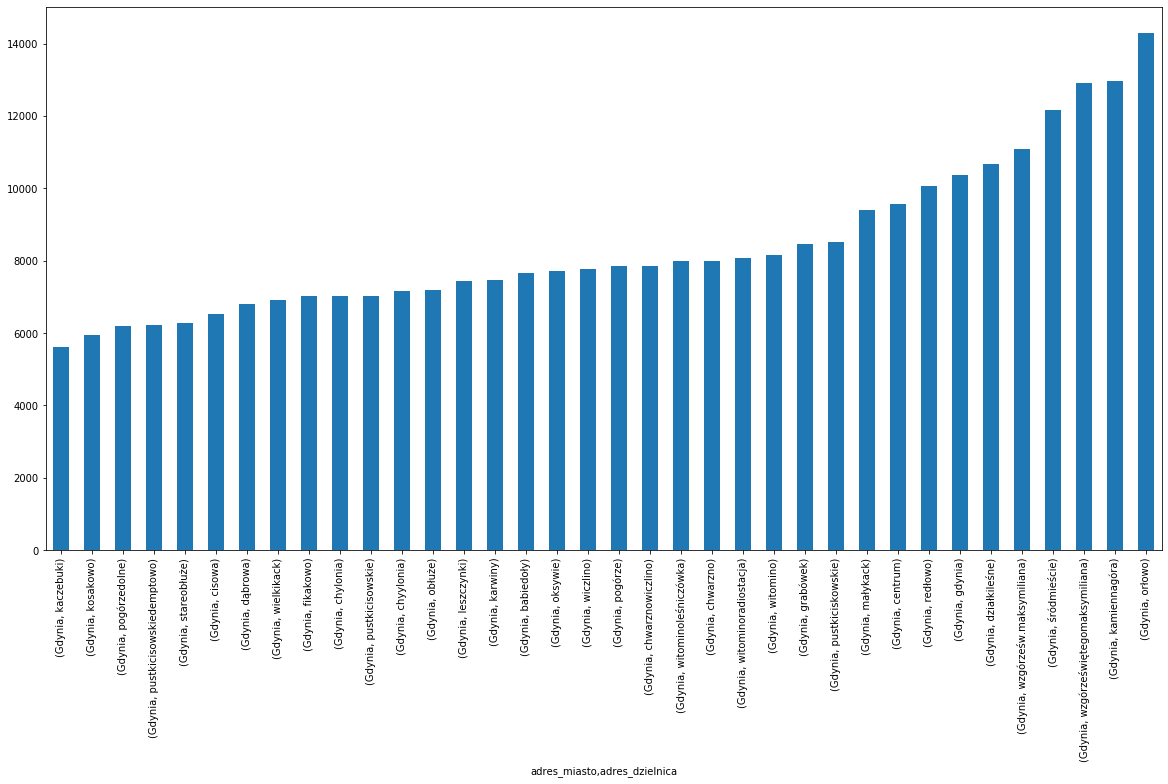

In [37]:
plt.figure(figsize=(20,10))
df_gratka[(df_gratka["adres_miasto"] == "Gdynia" ) & (df_gratka["typ_nieruchomosci"]== "mieszkania")].groupby(by=["adres_miasto", "adres_dzielnica"])["cena_za_metr"].mean().sort_values().plot.bar()

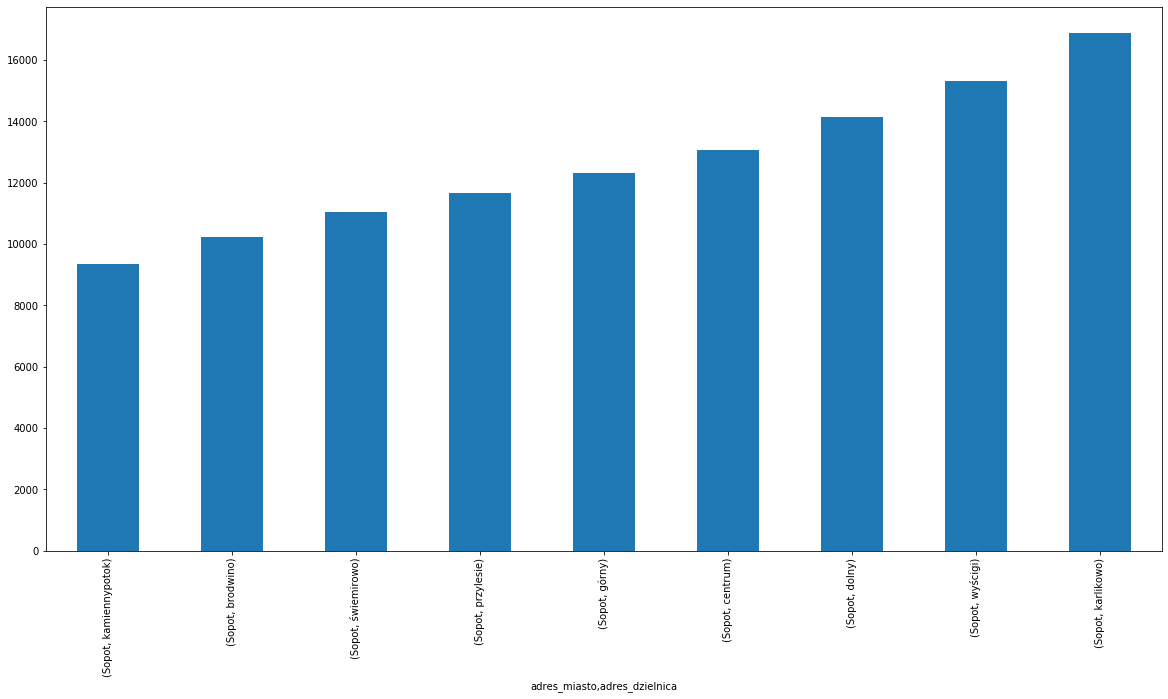

In [38]:
plt.figure(figsize=(20,10))
df_gratka[(df_gratka["adres_miasto"] == "Sopot" ) & (df_gratka["typ_nieruchomosci"]== "mieszkania")].groupby(by=["adres_miasto", "adres_dzielnica"])["cena_za_metr"].mean().sort_values().plot.bar()

In [34]:
#df_gratka.plot(x='rok_budowy', y=['cena'])

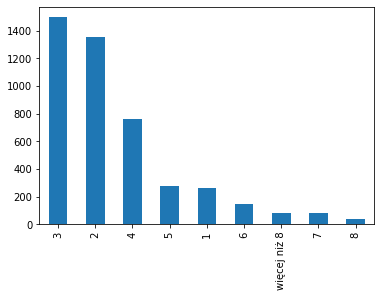

In [39]:
df_gratka['liczba_pokoi'].value_counts().plot.bar()

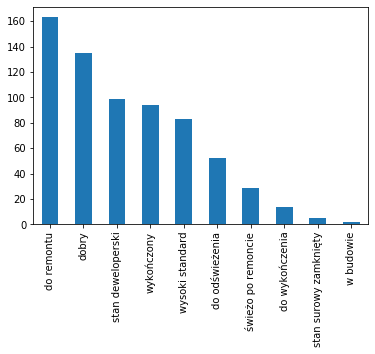

In [40]:
df_gratka['wykonczenie'].value_counts().plot.bar()

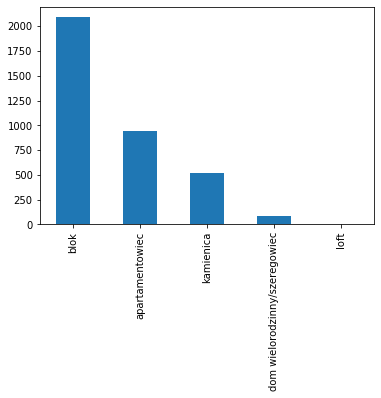

In [41]:
df_gratka['typ_domu'].value_counts().plot.bar()

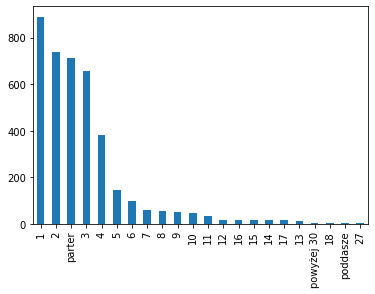

In [42]:
df_gratka['pietro'].value_counts().plot.bar()

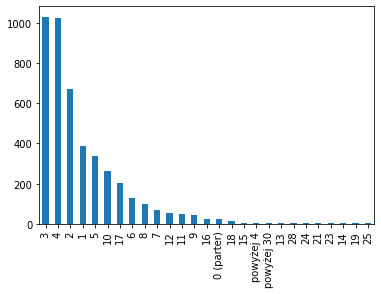

In [43]:
df_gratka['liczba_pieter_budynku'].value_counts().plot.bar()

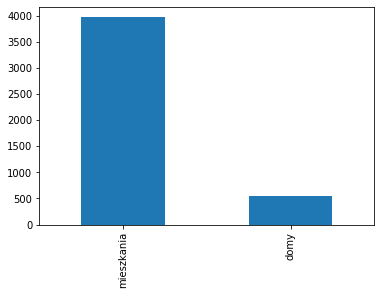

In [44]:
df_gratka['typ_nieruchomosci'].value_counts().plot.bar()

In [45]:
df_gratka2 = df_gratka[['cena','cena_za_metr','liczba_pokoi','powierzchnia','powierzchnia_dzialki', 'rok_budowy'
                        , 'kuchnia','typ_nieruchomosci', 'wykonczenie', 'zdjecie','rodzaj_zabudowy', 'typ_domu',  
                        'adres_miasto', #'adres_dzielnica','liczba_pieter_budynku', 'pietro'
                        #'data_aktualizacji','id_ogloszenia','tresc','data_dostepne',
                        # 'miejsce-parkingowe', 'forma-wlasnosci', 'oplaty-czynsz-administracyjny-media'
                       ]]
df_gratka2 = pd.get_dummies(df_gratka2)
df_gratka2.head()

,cena,cena_za_metr,powierzchnia,powierzchnia_dzialki,rok_budowy,zdjecie,liczba_pokoi_1,liczba_pokoi_2,liczba_pokoi_3,liczba_pokoi_4,...,rodzaj_zabudowy_kamienica,rodzaj_zabudowy_loft,typ_domu_apartamentowiec,typ_domu_blok,typ_domu_dom wielorodzinny/szeregowiec,typ_domu_kamienica,typ_domu_loft,adres_miasto_Gdańsk,adres_miasto_Gdynia,adres_miasto_Sopot
0,1890000.0,10500.00,180.0,255.0,1990.0,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1249000.0,10408.33,120.0,196.0,1930.0,True,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2890000.0,18062.50,160.0,835.0,NaN,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2990000.0,17485.38,171.0,329.0,1985.0,True,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2490000.0,5209.21,478.0,NaN,2002.0,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


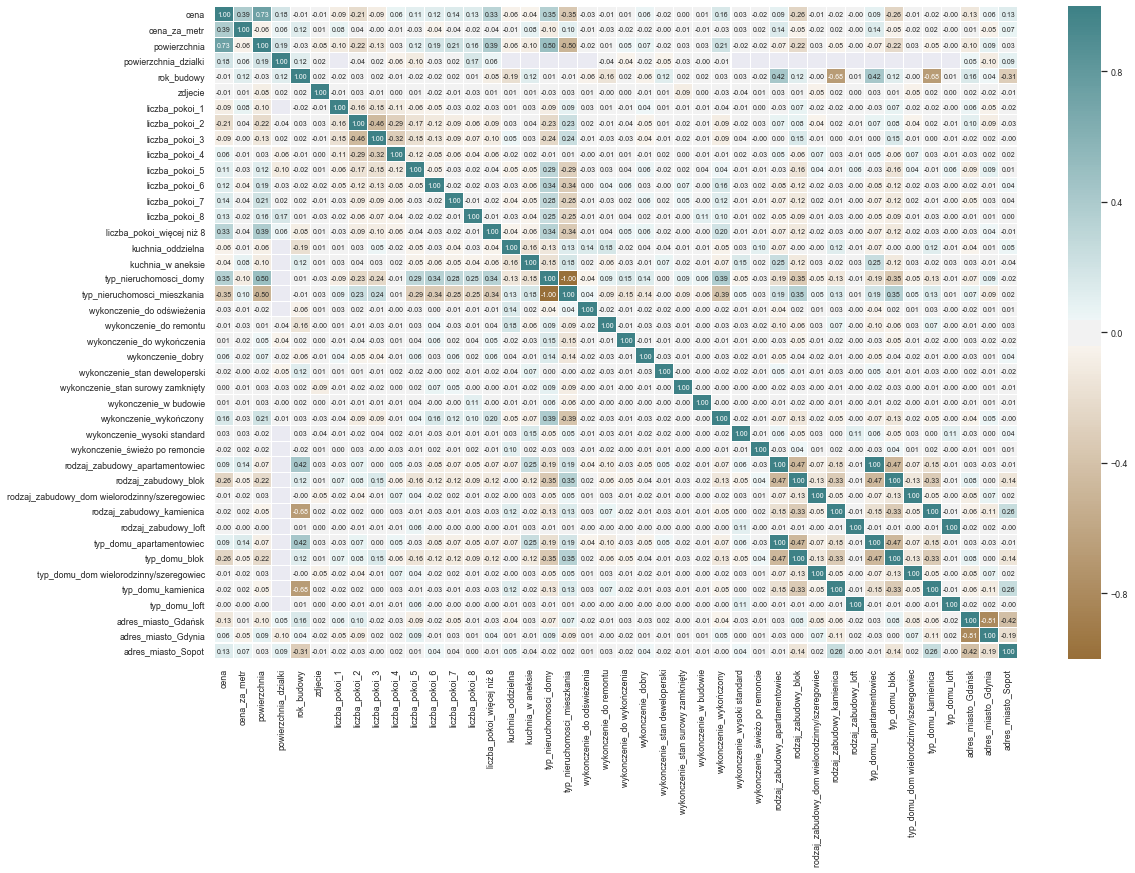

In [46]:
sns.set(font_scale=0.8)
fig, (ax) = plt.subplots(figsize=(18, 12))

corr = df_gratka2.corr()
ax = sns.heatmap( corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(50, 200, as_cmap=True),
                     annot=True, fmt='.2f', annot_kws={"size": 7}, linewidths=.05)
plt.show()

In [47]:
df_gratka['adres_miasto'].factorize()[0]

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64),
 Index(['Sopot', 'Gdynia', 'Gdańsk'], dtype='object'))

In [52]:
print(isinstance(df_gratka['adres_miasto'][0], list))

False


In [55]:
print(isinstance(df_gratka['cena'][0], float))

True


In [59]:
SUFFIX_CAT = '__cat'

for feat in df_gratka.columns:
  if isinstance(df_gratka[feat][0], list):
    continue

  factorized_values =  df_gratka[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df_gratka[feat] = factorized_values
  else:
    df_gratka[feat + SUFFIX_CAT] = factorized_values

In [60]:
df_gratka.head()

,cena,cena_za_metr,data_aktualizacji,id_ogloszenia,liczba_pieter_budynku,liczba_pokoi,powierzchnia,powierzchnia_dzialki,rok_budowy,tresc,...,zdjecie__cat,rodzaj_zabudowy__cat,typ_domu__cat,pietro__cat,data_dostepne__cat,miejsce-parkingowe__cat,forma-wlasnosci__cat,oplaty-czynsz-administracyjny-media__cat,adres_miasto__cat,adres_dzielnica__cat
0,1890000.0,10500.00,2020-05-16,15889337,4,5,180.0,255.0,1990.0,Dom - skrajny szereg o powierzchni użytkowej 1...,...,0,0,0,0,0,0,0,0,0,0
1,1249000.0,10408.33,2020-05-14,15675420,3,4,120.0,196.0,1930.0,BEZPIECZNA PREZENTACJA NIERUCHOMOŚCI\n\nDbając...,...,0,0,0,0,0,1,0,0,0,1
2,2890000.0,18062.50,2020-05-11,14800414,2,5,160.0,835.0,NaN,Organizujemy bezpieczne prezentacje na których...,...,0,0,0,0,0,1,0,0,0,0
3,2990000.0,17485.38,2020-05-15,13529041,1,4,171.0,329.0,1985.0,"DOM: na sprzedaż 3-kondygnacyjny (przyziemie, ...",...,0,0,0,0,0,1,0,0,0,2
4,2490000.0,5209.21,2020-05-11,16533912,2,7,478.0,NaN,2002.0,Na sprzedaż dom jednorodzinny w Sopocie Górnym...,...,0,0,0,0,0,1,0,0,0,0


In [65]:
cat_feats = [x for x in df_gratka.columns if SUFFIX_CAT in x ]
cat_feats = [x for x in cat_feats if 'cena' not in x]
cat_feats = [x for x in cat_feats if 'powierzchnia' not in x]
cat_feats = [x for x in cat_feats if 'rok' not in x]
print(cat_feats)
len(cat_feats)

['data_aktualizacji__cat', 'id_ogloszenia__cat', 'liczba_pieter_budynku__cat', 'liczba_pokoi__cat', 'tresc__cat', 'kuchnia__cat', 'typ_nieruchomosci__cat', 'tytul__cat', 'wykonczenie__cat', 'zdjecie__cat', 'rodzaj_zabudowy__cat', 'typ_domu__cat', 'pietro__cat', 'data_dostepne__cat', 'miejsce-parkingowe__cat', 'forma-wlasnosci__cat', 'oplaty-czynsz-administracyjny-media__cat', 'adres_miasto__cat', 'adres_dzielnica__cat']


19

In [74]:
df_gratka3 = df_gratka[['cena','cena_za_metr','powierzchnia','powierzchnia_dzialki', 'rok_budowy',
                        #'cena_za_metr__cat','powierzchnia__cat','powierzchnia_dzialki__cat', 'rok_budowy__cat',
                        'data_aktualizacji__cat', 'id_ogloszenia__cat', 'liczba_pieter_budynku__cat', 
                        'liczba_pokoi__cat', 'tresc__cat', 'kuchnia__cat', 'typ_nieruchomosci__cat', 
                        'tytul__cat', 'wykonczenie__cat', 'zdjecie__cat', 'rodzaj_zabudowy__cat', 
                        'typ_domu__cat', 'pietro__cat', 'data_dostepne__cat', 'miejsce-parkingowe__cat', 
                        'forma-wlasnosci__cat', 'oplaty-czynsz-administracyjny-media__cat', 'adres_miasto__cat', 
                        'adres_dzielnica__cat'
                       ]]
df_gratka3.head()

,cena,cena_za_metr,powierzchnia,powierzchnia_dzialki,rok_budowy,data_aktualizacji__cat,id_ogloszenia__cat,liczba_pieter_budynku__cat,liczba_pokoi__cat,tresc__cat,...,zdjecie__cat,rodzaj_zabudowy__cat,typ_domu__cat,pietro__cat,data_dostepne__cat,miejsce-parkingowe__cat,forma-wlasnosci__cat,oplaty-czynsz-administracyjny-media__cat,adres_miasto__cat,adres_dzielnica__cat
0,1890000.0,10500.00,180.0,255.0,1990.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1249000.0,10408.33,120.0,196.0,1930.0,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
2,2890000.0,18062.50,160.0,835.0,NaN,2,2,2,0,2,...,0,0,0,0,0,1,0,0,0,0
3,2990000.0,17485.38,171.0,329.0,1985.0,3,3,3,1,3,...,0,0,0,0,0,1,0,0,0,2
4,2490000.0,5209.21,478.0,NaN,2002.0,2,4,2,2,4,...,0,0,0,0,0,1,0,0,0,0


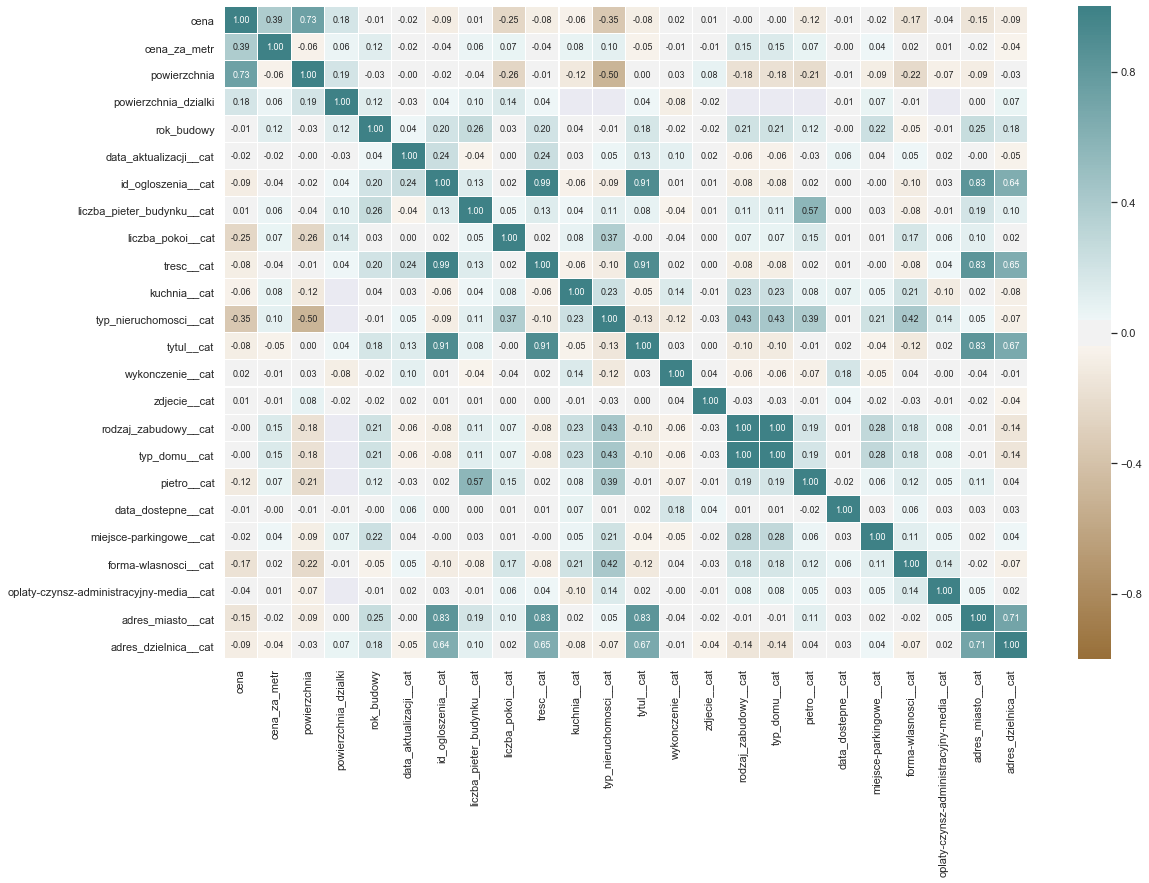

In [75]:
sns.set(font_scale=1)
fig, (ax) = plt.subplots(figsize=(18, 12))

corr = df_gratka3.corr()
ax = sns.heatmap( corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(50, 200, as_cmap=True),
                     annot=True, fmt='.2f', annot_kws={"size": 9}, linewidths=.05)
plt.show()